# Tarea 2

# 1.
Buscamos encontrar las raices de la siguiente funcion:
$$
y(x)= \cos{x} + \frac{6}{5}\sin{x^2}
$$
en el intervalo: 0(,2$\pi$)

In [ ]:
from pylab import *
%matplotlib inline

In [2]:
def raiz_bip(func, x_i,x_d, err=1e-5):
    raiz=0.5*(x_i+x_d)
    y_i,y_d = func(x_i), func(x_d)
    n=0
    while abs(raiz - x_d)>=err and abs(y_i - y_d)>=err:
        y_m = func(raiz)
        if y_m ==0.:
            print "chin le atine :O"
            break
        if y_m*y_i<0:
            x_d=raiz
        else:
            x_i=raiz
        raiz=0.5*(x_i+x_d)
        y_i,y_d = func(x_i), func(x_d)
        n+=1
        #print "paso: ", n , "raiz= ", raiz
    return raiz
        

In [21]:
def una_funcion(x):
    return cos(x)+(6./5.)*sin(x**2)
def d_una_funcion(x):
    return -sin(x)+2*x*(6/5)*cos(x**2)

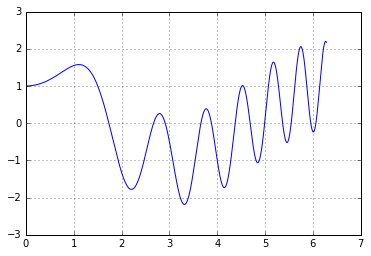

La raíz es: 1.73377182011


In [22]:
x=linspace(0,2*pi,20000)
plot (x,una_funcion(x))
grid (True)
show()

print "La raíz es:", raiz_bip(una_funcion,0,2*pi,1e-8)

dividir el intervalo en muchos cachitos y ver si hay un cambio de signo en ese sub intervalo
como en 10

In [23]:
def allroots(func,x_i,x_d,div):
    r=(x_d-x_i)/div
    for i in range(div):
        xi=r*i
        xd=r*(i+1)
        y_i,y_d = func(xi), func(xd)
        if y_i*y_d<0:
            print 'Hubo cambio de signo'
            print "La raiz es:", raiz_bip(una_funcion,xi,xd,1e-8)
            s=(xi-xd)/100
            for j in range(div):
                xxi=s*j
                xxd=s*(j+1)
                yyi,yyd = func(xxi), func(xxd)
                if yyi*yyd<0:
                    print 'Hubo cambio de signo otravez'
                    print " La raiz es:", raiz_bip(una_funcion,xxi,xxd,1e-8)
            j=j+1            
        i=i+1


In [25]:
allroots(una_funcion,0,2*pi,2000)

Hubo cambio de signo
La raiz es: 1.73377182062
Hubo cambio de signo
La raiz es: 2.6680907444
Hubo cambio de signo
La raiz es: 2.9117361367
Hubo cambio de signo
La raiz es: 3.65748885425
Hubo cambio de signo
La raiz es: 3.87851659865
Hubo cambio de signo
La raiz es: 4.37378838568
Hubo cambio de signo
La raiz es: 4.6872368307
Hubo cambio de signo
La raiz es: 4.99020598185
Hubo cambio de signo
La raiz es: 5.36717872847
Hubo cambio de signo
La raiz es: 5.54540053524
Hubo cambio de signo
La raiz es: 5.95538712502
Hubo cambio de signo
La raiz es: 6.06215494423


# 2. 
Si tenemos una funcion:
$$
f(x,y)=2e^{-(x+1)^2}(e^{-(y+2)^2}+e^{-(y-2)^2})+6x(x^2+y^2)e^{-(x^2 +y^2)}-1
$$

In [37]:
def funcion2(x,y):
    return 2*exp(-(x+1)**2)*(exp(-(y+2)**2)+exp(-(y-2)**2))+6*x*(x**2+y**2)*exp(-(x**2 +y**2))-1

In [55]:
def raiz_bip2(func, x_int,y_int, err=1e-5):
    #x_int,y_int=array(x_int), array(y_int)
    raizx=0.5*(x_int[0]+x_int[1])
    raizy=0.5*(y_int[0]+y_int[1])
    y_i,y_d = func(x_int[0],y_int[0]), func(x_int[1],y_int[1])
    while abs(raizx - x_int[1])>=err and abs(y_i - y_d)>=err:
        y_m = func(raizx,raizy)
        if y_m ==0.:
            print "chin le atine :O"
            break
        if y_m*y_i<0:
            x_int[1]=raizx
            y_int[1]=raizy
        else:
            x_int[0]=raizx
            y_int[0]=raizy
        raizx=0.5*(x_int[0]+x_int[1])
        raizy=0.5*(y_int[0]+y_int[1])
        y_i,y_d = func(x_int[0],y_int[0]), func(x_int[1],y_int[1])
    return array([raizx,raizy])
        

In [66]:
raiz_bip2(funcion2,[-4,4],[-4,4])

array([ 0.,  0.])

In [71]:
def allroots2(func,x_int,y_int,h):
    x=arange(x_int[0],x_int[1]+h,h)
    y=arange(y_int[0],y_int[1]+h,h)
    raiz_x=[]
    raiz_y=[]
    for i in range(len(x)-1):
        for j in range(len(y)-1):
            xi=x[i]
            yi=y[j]
            xd=x[i]
            yd=y[j+1]
            y_i,y_d = func(xi,yi), func(xd,yd)
            if y_i*y_d<=0:
                raizx,raizy= raiz_bip2(funcion2,[xi,xd],[yi,yd],1e-8)
                raiz_x.append(raizx)
                raiz_y.append(raizy)
                
    return array([raiz_x,raiz_y])

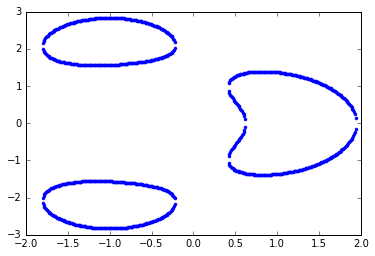

In [397]:
roots=allroots2(funcion2,[-4,4],[-4,4],1e-2)
plot(roots[0],roots[1], '.')
show()

Por lo que nos queda una carita feliz súper "cute".

# 3.a)
Vamos ahora a resolver el problema de la pelota en un plano inclinado con friccion proporcional a la velocidad
$$
\vec{F} = -g\hat{j} - f(\dot{\vec{x}},t)\dot{\hat{x}}
$$

$$
m\ddot{\vec{x}}= -g\hat{j} -f\dot{\hat{x}}
$$

Primero definimos a nuestro integrador:

In [314]:
def rk4(ec,p_ini,x,args=0,h=0.01):
    if (x[1]-x[0]) <= 5.*h:
        h = (x[1]-x[0])/10
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    if args==0:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i])
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    else:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i],args)
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h,args)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h,args)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h,args)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    return tiempos,sol

Ahora creamos una funcion para el plano inclinado:

In [271]:
def yplano(y0,x,angulo):
    return -tan(angulo*pi/180.)*x +y0

Damos una funcion que determine "la física" de nuestro problema_:

In [190]:
def e_mov(r_v,t,fric=0,g=9.8,m=1):
    u = sqrt(r_v[2]**2 + r_v[3]**2)
    dx= r_v[2]
    dy=r_v[3]
    if fric==0:
        dvx,dvy = 0,-(g/m)
        #print "No use un modelo de friccion"
    else:
        dvx = -fric([r_v[2],r_v[3]])[0]
        dvy = -(g/m) -fric([r_v[2],r_v[3]])[1]
        #print "use un modelo de friccion"
    return array([dx,dy,dvx,dvy])

En primer instante haremos una aproximación con la friccion lineal:

In [331]:
def fric_v(v,gamma=0.1):
    f_x=gamma*v[0]
    f_y=gamma*v[1]
    return array([f_x,f_y])
def fric_v2(v,gamma=0.1):
    norm_v=sqrt(v[0]**2 +v[1]**2)
    f_x=gamma*norm_v*v[0]
    f_y=gamma*norm_v*v[1]
    return array([f_x,f_y])

Definimos el movimiento de nuestra pelota:

In [329]:
def rebote(r_v_i,mi_dt,a,fric_v,y0):
    dt_busqueda = mi_dt/2
    #vel_rotx=(r_v_i[2]*cos(a*pi/180.)+r_v_i[3]*sin(a*pi/180.))
    #vel_roty=(-r_v_i[2]*sin(a*pi/180.)-r_v_i[3]*cos(a*pi/180.))
    #rvi=[r_v_i[0],r_v_i[1],vel_rotx,vel_roty]
    y_izq = r_v_i
    t,sol = rk4(e_mov,r_v_i,[0,dt_busqueda],fric_v)
    y_med = sol[-1,:]
    n=0
    while abs(y_izq[1]-yplano(y0,y_izq[0],a)) > 1e-4:
        n += 1
        if (y_izq[1]-yplano(y0,y_izq[0],a))*(y_med[1]-yplano(y0,y_med[0],a))< 0.:
            
            reinicio = y_izq
        else:
            reinicio = y_med
        dt_busqueda = dt_busqueda/2
        try:
            t,sol = rk4(e_mov,reinicio,[0,dt_busqueda],fric_v)
        except:
            print n, reinicio
            break
        y_izq = reinicio
        y_med = sol[-1,:]
    vel_rotx=(y_izq[2]*cos(a*pi/180.)-y_izq[3]*sin(a*pi/180.))
    vel_roty=(-y_izq[2]*sin(a*pi/180.)-y_izq[3]*cos(a*pi/180.))
    y_izq = array([y_izq[0],y_izq[1],vel_rotx,vel_roty])    
    
    
    return y_izq

In [291]:
def pelota(inicio,N,a,fric_v):
    trayectoria = zeros((N,len(inicio)))
    mi_dt = .1
    trayectoria[0,:] = array(inicio)
    
    for i in range(N-1):
        t,sol_dt = rk4(e_mov,trayectoria[i,:],[0,mi_dt],fric_v)
        if sol_dt[-1,:][1]-yplano(inicio[1],sol_dt[-1,:][0],a) < 0:
            punto =rebote(trayectoria[i,:],mi_dt,a,fric_v,inicio[1])
            trayectoria[i+1,:] = punto
        else:
            trayectoria[i+1,:] = sol_dt[-1,:]

    return trayectoria


Plano inclinado de 15°

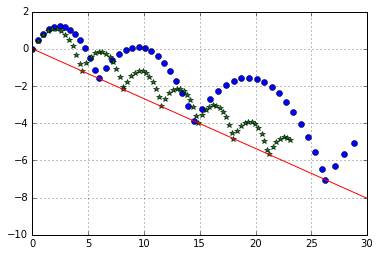

In [345]:
p=pelota([0,0,5,5],50,15.,fric_v)
plot (p[:,0],p[:,1],'o')
p=pelota([0,0,5,5],75,15.,fric_v2)
plot (p[:,0],p[:,1],'*')
grid(True)
x=linspace(0,30)
plot(x,yplano(0,x,15.))
show()

Plano inclinado de 30°

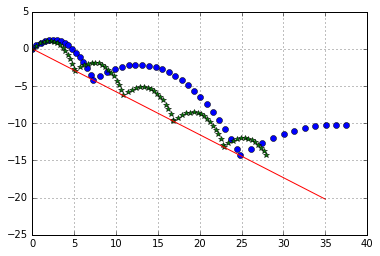

In [352]:
p=pelota([0,0,5,5],50,30.,fric_v)
plot (p[:,0],p[:,1],'o')
p=pelota([0,0,5,5],75,30.,fric_v2)
plot (p[:,0],p[:,1],'*')
grid(True)
x=linspace(0,35)
plot(x,yplano(0,x,30.))
show()

Plano inclinado de 45°

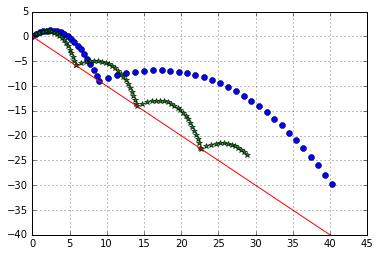

In [351]:
p=pelota([0,0,5,5],50,45.,fric_v)
plot (p[:,0],p[:,1],'o')
p=pelota([0,0,5,5],75,45.,fric_v2)
plot (p[:,0],p[:,1],'*')
grid(True)
x=linspace(0,40)
plot(x,yplano(0,x,45.))
show()

## c)
Ahora tiramos la pelota del otro lado.

Con el plano inclinado de 15°

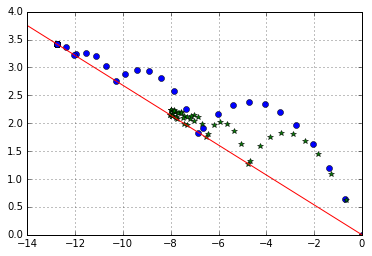

In [374]:
p=pelota([0,0,-7,7],50,15.,fric_v)
plot (p[:,0],p[:,1],'o')
p=pelota([0,0,-7,7],50,15.,fric_v2)
plot (p[:,0],p[:,1],'*')
grid(True)
x=linspace(-14,0)
plot(x,yplano(0,x,15.))
show()

Plano inclinado 30°

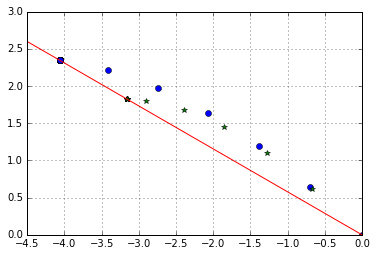

In [382]:
p=pelota([0,0,-7,7],100,30.,fric_v)
plot (p[:,0],p[:,1],'o')
p=pelota([0,0,-7,7],100,30.,fric_v2)
plot (p[:,0],p[:,1],'*')
grid(True)
x=linspace(-4.5,0)
plot(x,yplano(0,x,30.))
show()

Plano inclinado 45°

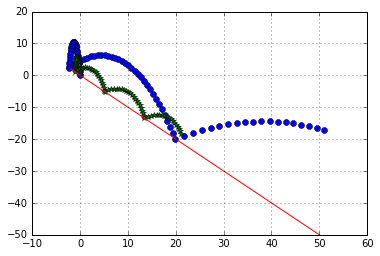

In [396]:
p=pelota([0,0,-1,15],80,45.,fric_v)
plot (p[:,0],p[:,1],'o')
p=pelota([0,0,-1,15],80,45.,fric_v2)
plot (p[:,0],p[:,1],'*')
grid(True)
x=linspace(-2,50)
plot(x,yplano(0,x,45.))
show()